In [45]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
PLAY_COUNTS_FILE = "train_triplets.txt"
SONGS_COUNTS_FILE = "songs-counts.csv"

The *train_triplets.txt* file contains triplets of (User, Song, Play count) and it's almost 3GB large. It contains no header and is *Tab* separated.

In [40]:
play_counts = pd.read_table(PLAY_COUNTS_FILE, header=None, names=["users","songs","counts"])
play_counts.head(10)

,users,songs,counts
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1


In [41]:
play_counts.describe()

,counts
count,4.837359e+07
mean,2.866859e+00
std,6.437725e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.667000e+03


What we need is the mapping song -> play count. We'll produce a new file containing only this information

In [42]:
songs_counts = play_counts.groupby(by="songs").sum()
songs_counts.head()

,counts
songs,
SOAAADD12AB018A9DD,24
SOAAADE12A6D4F80CC,12
SOAAADF12A8C13DF62,9
SOAAADZ12A8C1334FB,12
SOAAAFI12A6D4F9C66,188


In [44]:
songs_counts.describe()

,counts
count,384546.000000
mean,360.633690
std,3256.809395
min,1.000000
25%,8.000000
50%,32.000000
75%,133.000000
max,726885.000000


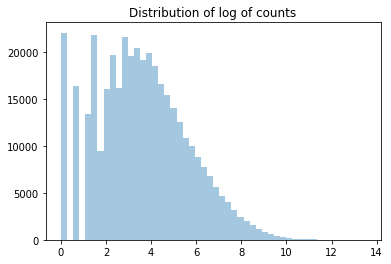

In [57]:
plt.title("Distribution of log of counts")
sns.distplot(songs_counts.apply(np.log), kde=False)

In [43]:
songs_counts.to_csv(SONGS_COUNTS_FILE)